In [2]:
# Importing necessary libraries for data manipulation, numericaloperations, and visualization.
import pandas as pnd   # For data manipulation and analysis, similar to Excel in Python.
import numpy as npy    # When performing numerical calculations and utilizing arrays.
import matplotlib.pyplot as plb  # To make plots and visuals.
import seaborn as srn  # For statistical datavisualization, based on matplotlib.

# Importing libraries for handling files, directories, and generatingrandomnumbers.
import glob           # For retrieving files/pathnames matching a specifiedpattern.
import random         # For generating random numbers and making random selections.
import os             # For interacting with the operating system, like fileoperations.

# Importing tqdm for displaying progress bars.
from tqdm import tqdm  # For showingprogress bars in loops, useful for longoperations.

# Importing OpenCV for image processing tasks.
import cv2            # For image processing and computervisiontasks.

# Importing TensorFlow modules and EfficientNetV2L model for deeplearning.
from tensorflow.keras.applications import EfficientNetV2L  # Pre-trained EfficientNetV2Lmodel for imageclassificationtasks.
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D  # Layersfor building the neuralnetwork.
from tensorflow.keras.models import Model  # Base class for constructing the model.

# Importing ImageDataGenerator for image dataaugmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For augmenting-and-processingimage dataduringtraining.

# Importing metrics from scikit-learn for evaluating model performance.
from sklearn.metrics import precision_score, recall_score, f1_score  # For calculating precisionscore, recallscore, and F1score.
from sklearn.metrics import classification_report  # To produce an in-depth classification report.
from sklearn.metrics import confusion_matrix  # For creating a confusionmatrix to evaluate classificationperformance.

# Importing StratifiedKFold for cross-validation.
from sklearn.model_selection import StratifiedKFold  # For performing stratifiedKfoldcrossvalidation.

# Importing TensorFlow for deeplearningtasks.
import tensorflow as tf  # Core TensorFlowlibrary for building and trainingmodels.

# Suppressingspecific warnings to keep the outputclean, especiallywarnings related to Keras data adapters.
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='keras.src.trainers.data_adapters.py_dataset_adapter')

In [ ]:
# unziping zip file of the dataset
!unzip "/content/drive/MyDrive/Pneumonia_Image_Classification/archive (3).zip"

Streaming output truncated to the last 5000 lines.
  inflating: archive (3)/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: archive (3)/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: archive (3)/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: archive (3)/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: archive (3)/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: archive (3)/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: archive (3)/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: archive (3)/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: archive (3)/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: archive (3)/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: archive (3)/chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: archive (3)/chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: archive (3)/chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: archive (3)/chest_xray/t

In [ ]:
# Collecting all file paths for X-ray images in the Pneumonia dataset.
# glob.glob is used to search for files matching the given pattern, in this case, across multiple subdirectories.
XRay_Images_Pneumonia_Dataset = glob.glob("/content/archive (3)/**/**/**/**")

# Shuffling the list of file paths randomly to ensure a random distribution when loading the data.
random.shuffle(XRay_Images_Pneumonia_Dataset)

# Displaying the shuffled list of file paths for the X-ray images.
XRay_Images_Pneumonia_Dataset

['/content/archive (3)/chest_xray/train/PNEUMONIA/person537_virus_1067.jpeg',
 '/content/archive (3)/chest_xray/train/PNEUMONIA/person1486_bacteria_3884.jpeg',
 '/content/archive (3)/chest_xray/test/PNEUMONIA/person1676_virus_2892.jpeg',
 '/content/archive (3)/chest_xray/train/PNEUMONIA/person21_bacteria_72.jpeg',
 '/content/archive (3)/chest_xray/train/PNEUMONIA/person110_virus_208.jpeg',
 '/content/archive (3)/chest_xray/train/PNEUMONIA/person1690_bacteria_4475.jpeg',
 '/content/archive (3)/chest_xray/train/PNEUMONIA/person1062_bacteria_2996.jpeg',
 '/content/archive (3)/chest_xray/train/PNEUMONIA/person537_bacteria_2263.jpeg',
 '/content/archive (3)/chest_xray/train/PNEUMONIA/person582_bacteria_2403.jpeg',
 '/content/archive (3)/chest_xray/train/PNEUMONIA/person557_virus_1097.jpeg',
 '/content/archive (3)/chest_xray/train/PNEUMONIA/person441_virus_897.jpeg',
 '/content/archive (3)/chest_xray/train/PNEUMONIA/person1565_bacteria_4095.jpeg',
 '/content/archive (3)/chest_xray/train/PNEU

In [ ]:
# printing the total images_counts
print(f"Total images count: {len(XRay_Images_Pneumonia_Dataset)}")

Total images count: 5856


In [ ]:
# Initialize empty lists to store file names and categories
XRay_Images_Pneumonia_file_name = []
XRay_Images_Pneumonia_category = []

# Loop through each image in the dataset, tracking progress with tqdm
for i in tqdm(range(len(XRay_Images_Pneumonia_Dataset))):

    # Extract the file name from the full path and add it to the file name list
    XRay_Images_Pneumonia_file_name.append(XRay_Images_Pneumonia_Dataset[i].split(os.path.sep)[-1])

    # Extract the category (which is the parent directory name) and add it to the category list
    XRay_Images_Pneumonia_category.append(XRay_Images_Pneumonia_Dataset[i].split(os.path.sep)[-2])

100%|██████████| 5856/5856 [00:00<00:00, 719086.69it/s]


In [ ]:
# Create a DataFrame from the lists of file names and categories
XRay_Images_Pneumonia_data_df = pnd.DataFrame({'file_name': XRay_Images_Pneumonia_file_name, 'category': XRay_Images_Pneumonia_category})

# To confirm the data, show the DataFrame's first eight rows.
XRay_Images_Pneumonia_data_df.head(8)

,file_name,category
0,person537_virus_1067.jpeg,PNEUMONIA
1,person1486_bacteria_3884.jpeg,PNEUMONIA
2,person1676_virus_2892.jpeg,PNEUMONIA
3,person21_bacteria_72.jpeg,PNEUMONIA
4,person110_virus_208.jpeg,PNEUMONIA
5,person1690_bacteria_4475.jpeg,PNEUMONIA
6,person1062_bacteria_2996.jpeg,PNEUMONIA
7,person537_bacteria_2263.jpeg,PNEUMONIA


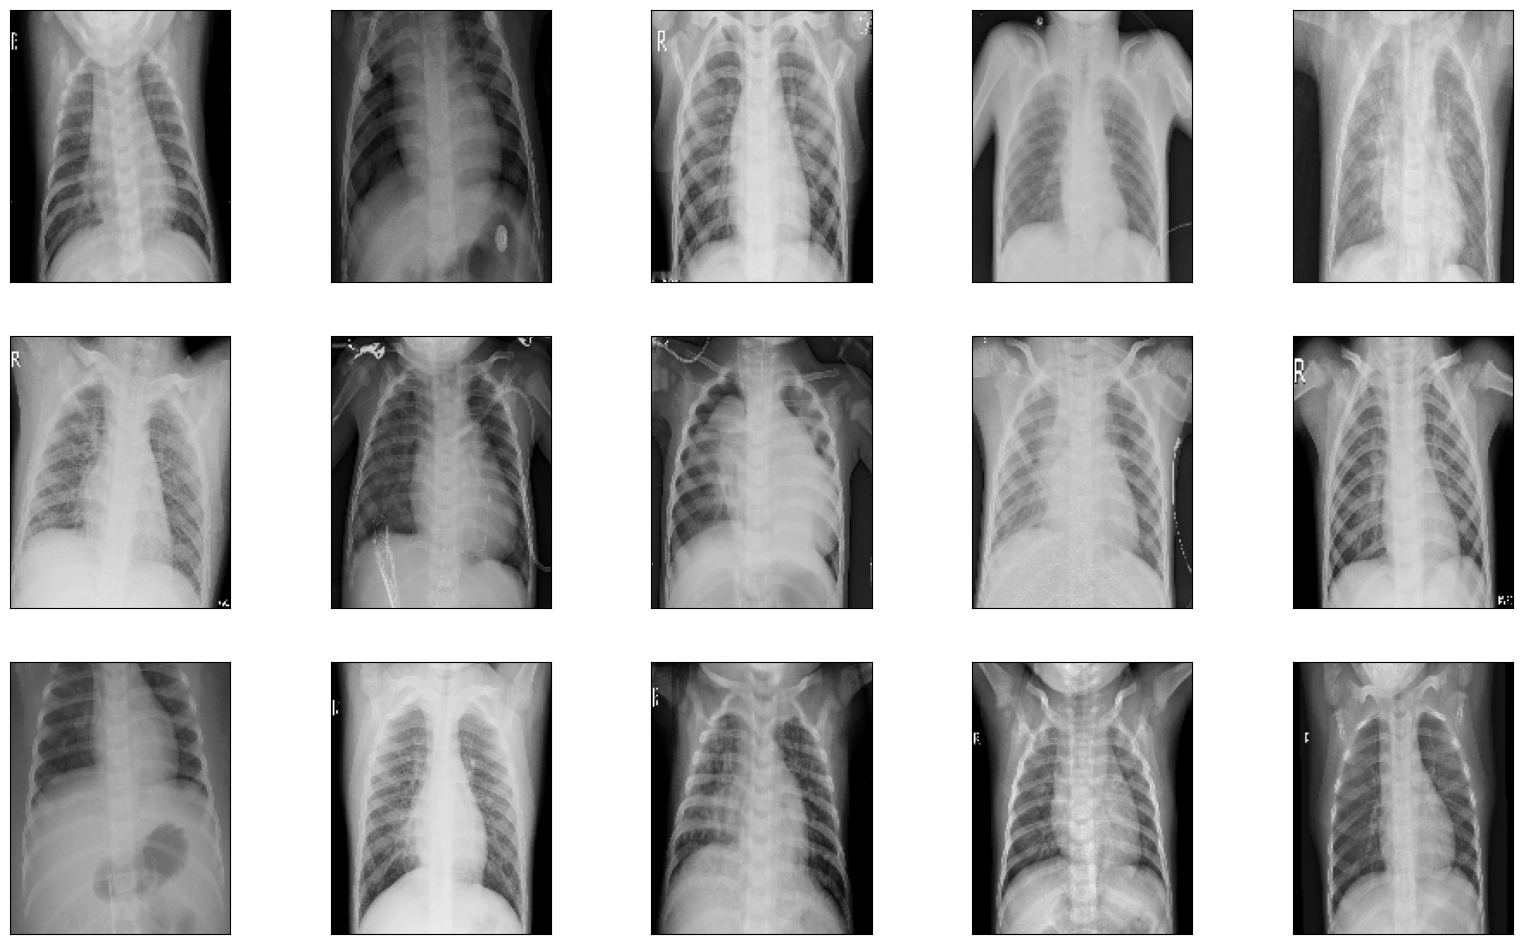

In [ ]:
# Set the size of the figure to 20x12 inches, providing ample space for displaying images
plb.figure(figsize=(20, 12))

# Cycleover the dataset's first 15 photos.
for i in range(15):

    #Make a 3 row by 5 column subplot grid and place each image in its designated slot.
    plb.subplot(3, 5, i + 1)

    # Use OpenCVtoread the image
    img = cv2.imread(XRay_Images_Pneumonia_Dataset[i])

    # In order to displaycolorscorrectly, convertimage from BGR(OpenCV'sdefault)toRGB.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # To ensure consistency in display, resize the picture to 128by 158pixels.
    img = cv2.resize(img, (128, 158))

    # Make the picture visible in the activesubplot
    plb.imshow(img)

    # Remove the xaxis and yaxis ticks for a cleanerimagedisplay
    plb.xticks([])
    plb.yticks([])

In [ ]:
# categories_counts of data
XRay_Images_Pneumonia_data_df.groupby('category').count()

,file_name
category,
NORMAL,1583
PNEUMONIA,4273


In [ ]:
# Initialize emptylists to storeprocessedimages and their correspondinglabels
Pneumonia_images_list = []
Pneumonia_labels_list = []

# Loop throughentire_dataset with a progress bar for visual feedback
for i in tqdm(range(len(XRay_Images_Pneumonia_Dataset))):
    try:
        # Readimage from the dataset usingOpenCV
        img = cv2.imread(XRay_Images_Pneumonia_Dataset[i])

        # Convertesimage fromBGR to RGBcolor format
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        #Scale the picture to 128by 158pixels, the normalsize.
        img = cv2.resize(img, (128, 158))

        # Append the processedimage to the imageslist
        Pneumonia_images_list.append(img)

        # Extract the category (NORMAL or PNEUMONIA) from the directory structure
        Cat = XRay_Images_Pneumonia_Dataset[i].split(os.path.sep)[-2]

        # Give eachcategory a numerical_designation (0for-NORMAL, 1for-PNEUMONIA).
        if Cat == "NORMAL":
            lbl = 0
        elif Cat == "PNEUMONIA":
            lbl = 1

        # Append the label to the labels list
        Pneumonia_labels_list.append(lbl)

    except:
        # Skip any image that raises an exception during processing
        pass

100%|██████████| 5856/5856 [00:44<00:00, 131.17it/s]


# ***Image to Numpy Array***

In [ ]:
Pneumonia_images_array = npy.array(Pneumonia_images_list)
Pneumonia_labels_array = npy.array(Pneumonia_labels_list).reshape(len(Pneumonia_labels_list),)

# Print shapes of the arrays
print("Shape of Pneumonia_imgs_arr:", Pneumonia_images_array.shape)
print("Shape of Pneumonia_lbls_arr:", Pneumonia_labels_array.shape)

Shape of Pneumonia_imgs_arr: (5856, 158, 128, 3)
Shape of Pneumonia_lbls_arr: (5856,)


# ***Data_Splitting***

In [ ]:
from sklearn.model_selection import train_test_split

# Using the dataset to create training and testing sets.
# We setaside 30% of the data for testingset and use the remaining 70% for trainingset.
# The images are in the 'Pneumonia_images_array' and the labels are in the 'Pneumonia_labels_array'.
XPneumonia_images_train, XPneumonia_images_test, yPneumonia_images_train, yPneumonia_images_test = train_test_split(

    # The array of images is the first input, followed by the corresponding labels.
    Pneumonia_images_array, Pneumonia_labels_array,

    # Using the dataset to create trainingset and testingset.
    test_size=0.3,

    # Making sure the split is repeatable by adjusting the randomseed.
    random_state=42
)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Converttraininglabels to onehotencoded_format for categoricalclassification
yPneumonia_images_train = to_categorical(yPneumonia_images_train)

# Converttestlabels to onehotencoded format for consistent classificationoutput
yPneumonia_images_test = to_categorical(yPneumonia_images_test)

# ***Model1: EfficientNetV2L***

In [ ]:
# Use pre-trained ImageNet weights to initialize the EfficientNetV2L model.
# Indicate the inputshape of the photos and remove the uppermost fullylinkedlayers.
base_model = EfficientNetV2L(weights='imagenet', include_top=False, input_shape=(158, 128, 3))

# Extract the outputtensor from the basemodel.
x = base_model.output

# Use globalaveragepooling to make the output's spatialdimensions smaller.
x = GlobalAveragePooling2D()(x)

# Incorporate non-linearity by using a dense layer comprising 128 neurons with ReLU activation.
x = Dense(128, activation='relu')(x)

#To obtain class probabilities, add the last dense layer, which consists of two neurons and softmax activation.
predictions = Dense(2, activation='softmax')(x)

# Build the entire model using the customclassification head and the EfficientNetV2Lbase.
model = Model(inputs=base_model.input, outputs=predictions)

# To stop the base model's layers' weights from changing during training, freeze them.
for layer in base_model.layers:
  layer.trainable = False

# To confirm modelarchitecture's parameters and structure, print a summary of it.
model.summary()

473176280/473176280 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 158, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 158, 128, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 79, 64, 32)     │            864 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 79, 64, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 79, 64, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 79, 64, 32)     │          9,216 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 79, 64, 32)     │            128 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 79, 64, 32)     │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_add (Add)         │ (None, 79, 64, 32)     │              0 │ block1a_project_activ… │
│                           │                        │                │ stem_activation[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_conv      │ (None, 79, 64, 32)     │          9,216 │ block1a_add[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_bn        │ (None, 79, 64, 32)     │            128 │ block1b_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_activati… │ (None, 79, 64, 32)     │              0 │ block1b_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_drop (Dropout)    │ (None, 79, 64, 32)     │              0 │ block1b_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_add (Add)         │ (None, 79, 64, 32)     │              0 │ block1b_drop[0][0],    │
│                           │                        │                │ block1a_add[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1c_project_conv 

 Total params: 117,911,074 (449.80 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 117,746,848 (449.17 MB)

In [ ]:
# Assembling_model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ***Image Augumentation***

In [ ]:
# Created an instance of ImageDataGen. to apply realtimedataaugmentation
# duringtraining. This helps in improving modelgeneralization.
datagen = ImageDataGenerator(
    rotation_range=20,           # Rotatepictures up to 20degrees at random
    width_shift_range=0.2,       # Adjust images horizontally at random, up to a 20% width shift
    height_shift_range=0.2,      # Adjust pictures vertically at random by up to 20% of theirheight
    shear_range=0.2,             # Use arbitrary shear transforms
    zoom_range=0.2,              # Adjust the zoom by upto20% at random.
    horizontal_flip=True,        # Flip photos horizontally at random
    fill_mode='nearest'          # Use the closest pixel value to fill in any missingpixels.
)

# Align the trainingset of data with the data generator. This computes any necessarystatistics.
# for the trainingimage-based augmentationtransformations.
datagen.fit(XPneumonia_images_train)

In [ ]:
# Trainmodel using the data generator with realtime augmentation.
# The generatorprovides batches of augmented imagestraining.
model.fit(
    datagen.flow(XPneumonia_images_train, yPneumonia_images_train, batch_size=32),  # Generate batches of augmented trainingdata
    epochs=10,  # Specify the number of epochs to trainmodel
    validation_data=(XPneumonia_images_test, yPneumonia_images_test)  # Providevalidation data for monitoring performance duringtraining
)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 176s 689ms/step - accuracy: 0.8434 - loss: 0.3467 - val_accuracy: 0.9129 - val_loss: 0.2106
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 145ms/step - accuracy: 0.9075 - loss: 0.2324 - val_accuracy: 0.9135 - val_loss: 0.2047
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 146ms/step - accuracy: 0.9126 - loss: 0.2214 - val_accuracy: 0.8936 - val_loss: 0.2402
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - accuracy: 0.9087 - loss: 0.2268 - val_accuracy: 0.9101 - val_loss: 0.2127
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - accuracy: 0.9281 - loss: 0.1893 - val_accuracy: 0.9277 - val_loss: 0.1756
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 145ms/step - accuracy: 0.9168 - loss: 0.2038 - val_accuracy: 0.9345 - val_loss: 0.1642
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 146ms/step - accuracy: 0.9258 - loss: 0.1912 - val_accuracy: 0.9192 - val_loss: 0.1964
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - accuracy: 0.9241 - loss: 

In [ ]:
# Assess the model's generalizationability to newdata by analyzing itsperformance on the testdataset.
loss, accuracy = model.evaluate(XPneumonia_images_test, yPneumonia_images_test)

# Printed the calculatedloss and accuracy from the evaluation to understand the model's performance.
print("Loss:", loss)
print("Accuracy:", accuracy)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9397 - loss: 0.1735
Loss: 0.1693239063024521
Accuracy: 0.9385315775871277


In [ ]:
# Predict using the trainingmodel on the testdataset.
y_pneumonia_pred = model.predict(XPneumonia_images_test)

# By choosing the index with the highest likelihood, the anticipated probabilities were transformed into class labels.
y_pred_binary_pneumonia = npy.argmax(y_pneumonia_pred, axis=1)

# Using the index with the highest probability, the truelabels were transformed from onehotencoding to classlabels.
y_true_binary_pneumonia = npy.argmax(yPneumonia_images_test, axis=1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 35s 335ms/step


In [ ]:
# By comparing the genuinelabels with the predicted labels, you may determine the model's precision.
precision = precision_score(y_true_binary_pneumonia, y_pred_binary_pneumonia)

# Computed the model's recall by contrasting the true and predictedlabels.
recall = recall_score(y_true_binary_pneumonia, y_pred_binary_pneumonia)

# The model's performance can be assessed by computing the F1score, which is the harmonicmean of precisionscore and recallscore.
f1 = f1_score(y_true_binary_pneumonia, y_pred_binary_pneumonia)

# Printed the precisionsore, recallscore, and F1score to assess the model'sclassificationperformance.
print("PrecisionScore:", precision)
print("RecallScore   :", recall)
print("F1Score       :", f1)

Precision: 0.9865092748735245
Recall   : 0.9270998415213946
F1-score : 0.9558823529411764


In [ ]:
datasetlables = ['NORMAL', 'PNEUMONIA']

In [ ]:
# classificationreport of the model
print(classification_report(y_true_binary_pneumonia, y_pred_binary_pneumonia, target_names=datasetlables))

              precision    recall  f1-score   support

      NORMAL       0.84      0.97      0.90       495
   PNEUMONIA       0.99      0.93      0.96      1262

    accuracy                           0.94      1757
   macro avg       0.91      0.95      0.93      1757
weighted avg       0.94      0.94      0.94      1757



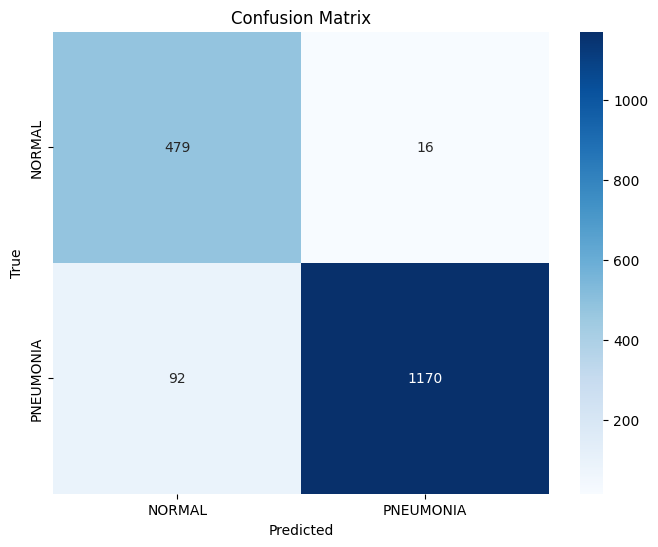

In [ ]:
# Computed the confusionmatrix to evaluate the performance of the classificationmodel.
cm = confusion_matrix(y_true_binary_pneumonia, y_pred_binary_pneumonia)

# Seted the confusionmatrix plot's figuresize.
plb.figure(figsize=(8, 6))

# Created heatmap of the confusionmatrix.
srn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=datasetlables, yticklabels=datasetlables)

# Label the x-axis as 'Predicted' to indicate the predictedclasses.
plb.xlabel('Predicted')

# Label the yaxis as 'True' to indicate the actualclasses.
plb.ylabel('True')

# Seting the title of the plot to 'ConfusionMatrix'.
plb.title('Confusion Matrix')

# Display the confusionmatrixplot.
plb.show()

# ***Model2: k = 10 Fold EfficientNetV2L***

In [ ]:
num_folds = 10  # Define the number of foldscrossvalidation

# Initialize the StratifiedKFold with the specified number of folds and randomseedreproducibility
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Checking if the targetlabels are onedimensional; if so, convert them to onehotencodedformat
if yPneumonia_images_train.ndim == 1:
    yPneumonia_images_train = tf.keras.utils.to_categorical(yPneumonia_images_train, num_classes=2)

accuracy_per_fold = []  # List to storeaccuracy for eachfold

# Iterate through eachfold of the StratifiedKFoldsplit
for train_index, val_index in kfold.split(XPneumonia_images_train, np.argmax(yPneumonia_images_train, axis=1)):
    # Splited the data into trainingset and validationsets for the currentfold
    X_train, X_val = XPneumonia_images_train[train_index], XPneumonia_images_train[val_index]
    y_train, y_val = yPneumonia_images_train[train_index], yPneumonia_images_train[val_index]

    # In order to load the EfficientNetV2Lmodel, remove the topclassificationlayer and use pretrainedImageNet weights.
    base_model2 = EfficientNetV2L(weights='imagenet', include_top=False, input_shape=(158, 128, 3))

    # Added a GlobalAveragePooling2D_layer to reduce the featuremaps to a singlevector
    x = base_model2.output
    x = GlobalAveragePooling2D()(x)

    # Added a Denselayer with 128units-and-ReLUactivation for furtherprocessing
    x = Dense(128, activation='relu')(x)

    # Added the finalDenselayer with 2units and softmaxactivation for classification
    predictions = Dense(2, activation='softmax')(x)

    # Define the completemodel with the baseEfficientNetV2L model and the newclassification layers
    model2 = Model(inputs=base_model2.input, outputs=predictions)

    # To avoid the base model's layers' weights changing while training, freeze them.
    for layer in base_model2.layers:
        layer.trainable = False

    # CompiledModel with Adamoptimizer-and-categoricalcrossentropy lossfunction
    model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Initialize an ImageDataGen. for data-augmentationwith varioustransformations
    datagen = ImageDataGenerator(
        rotation_range=20,  # Randomlyrotate imageswithin 20degrees
        width_shift_range=0.2,  # Randomly shifted imageshorizontally byup to 20% of thewidth
        height_shift_range=0.2,  # Randomly shifted imagesvertically byup to 20% of theheight
        shear_range=0.2,  # Apply random sheartransformations
        zoom_range=0.2,  # Apply random zoomingtransformations
        horizontal_flip=True,  # Randomlyflip imageshorizontally
        fill_mode='nearest'  # FillMissing pixelsafter transformations withthe nearestpixelvalue
    )

    # Align-generator-of-datawith-the-trainingset.
    datagen.fit(X_train)

    # Trainthe-model-using the data-generator-and-validate-on-the-validationset
    model2.fit(
        datagen.flow(X_train, y_train, batch_size=32),  # Provide-batches-of-augmenteddata
        epochs=3,  # Train-for-3-epochs
        validation_data=(X_val, y_val),  # Validate-on-the-validationset
        verbose=1  # Printed-trainingprogress
    )

Epoch 1/3
116/116 ━━━━━━━━━━━━━━━━━━━━ 168s 757ms/step - accuracy: 0.8205 - loss: 0.3722 - val_accuracy: 0.8317 - val_loss: 0.3652
Epoch 2/3
116/116 ━━━━━━━━━━━━━━━━━━━━ 17s 140ms/step - accuracy: 0.8952 - loss: 0.2388 - val_accuracy: 0.8415 - val_loss: 0.3593
Epoch 3/3
116/116 ━━━━━━━━━━━━━━━━━━━━ 17s 135ms/step - accuracy: 0.9173 - loss: 0.2053 - val_accuracy: 0.9146 - val_loss: 0.1997
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9154 - loss: 0.2057
Validation accuracy for fold 1: 0.9146341681480408
Epoch 1/3
116/116 ━━━━━━━━━━━━━━━━━━━━ 157s 659ms/step - accuracy: 0.8214 - loss: 0.3737 - val_accuracy: 0.9024 - val_loss: 0.2338
Epoch 2/3
116/116 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.9017 - loss: 0.2444 - val_accuracy: 0.9171 - val_loss: 0.1948
Epoch 3/3
116/116 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.9185 - loss: 0.2132 - val_accuracy: 0.8878 - val_loss: 0.2416
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9082 - loss: 0.2274
Validation accuracy

In [ ]:
# EvaluatedModel on the validationset to obtain the loss and accuracymetrics
loss2, accuracy2 = model2.evaluate(X_val, y_val)

# Printed the lossvalue from the evaluation, which represents the model's error on the validationdata
print("Loss:", loss2)

# printed-accuracy value from the assessment, a measure of how well the genuine labels and the model's predictions agree.
print("Accuracy:", accuracy2)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9263 - loss: 0.2029
Loss: 0.21038077771663666
Accuracy: 0.92665034532547


In [ ]:
# Predictedlabels for the testsetusing the trainedmodel
y_pred_final = model2.predict(XPneumonia_images_test)

# Converted anticipated probabilities to class labels by determining which index had the highest likelihood
y_pred_binary_final = np.argmax(y_pred_final, axis=1)

# Transformed true labels into class labels by determining which index had the highest likelihood
y_true_binary_final = np.argmax(yPneumonia_images_test, axis=1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [ ]:
# Calculated the precisionscore for the test setpredictions
precision_final = precision_score(y_true_binary_final, y_pred_binary_final)

# Calculated the recallscore for the testsetpredictions
recall_final = recall_score(y_true_binary_final, y_pred_binary_final)

# Calculated the F1score for the testsetpredictions
f1_final = f1_score(y_true_binary_final, y_pred_binary_final)

# Out of all the positiveforecasts, the precision score was printed, showing the percentage of real positive predictions.
print("Final Precisionscore on TestSet:", precision_final)

# Out of all real positiveinstances, the recallscore was printed, showing the percentage of truepositiveforecasts.
print("Final Recallscore on TestSet   :", recall_final)

# PrintedF1score, which offers a fair assessment of performance as the harmonic mean of recall-and-precision.
print("Final F1score on TestSet :", f1_final)

In [ ]:
# Printed the classificationreport which provides detailed metrics for eachclass, including precisionscore, recallscore, and F1score
# 'target_names' specifies the names of classes in the dataset, making the report easier-to-interpret
print(classification_report(y_true_binary_final, y_pred_binary_final, target_names=datasetlables))

              precision    recall  f1-score   support

      NORMAL       0.81      0.94      0.87       495
   PNEUMONIA       0.97      0.92      0.94      1262

    accuracy                           0.92      1757
   macro avg       0.89      0.93      0.91      1757
weighted avg       0.93      0.92      0.92      1757



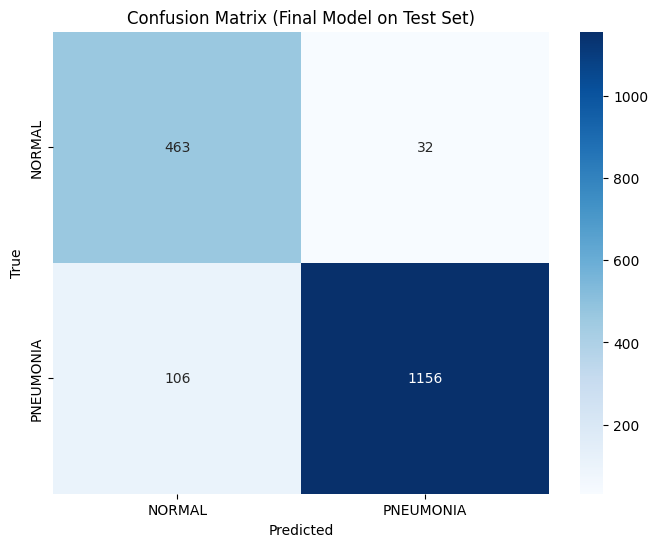

In [ ]:
# Computed the confusionmatrix for the testset predictions
cm_final = confusion_matrix(y_true_binary_final, y_pred_binary_final)

# Created a figure for the confusionmatrix ploted with specifiedsize
plb.figure(figsize=(8, 6))

# Generate a heatmap of the confusionmatrix with annotations and color map
# 'annot=True' displays the numericalvalues in each cell, 'fmt='d'' formats them as integers
# 'cmap='Blues'' specifies the color map for the heatmap
# 'xticklabels' and 'yticklabels' add the class labels to the x and y axes respectively
srn.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=datasetlables, yticklabels=datasetlables)

# Seted the labelfor the xaxis to 'Predicted'
plb.xlabel('Predicted')

# Seted the labelfor the yaxis to 'True'
plb.ylabel('True')

# Seted the title of the ploted
plb.title('Confusion Matrix (Final Model on Test Set)')

# Display the confusionmatrixplot
plb.show()

FileNotFoundError: Cannot find file: Base_Code_Dimple_Pneumonia.ipynb